In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Load the CSV file
df = pd.read_csv('barc.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filtering the dataset for the year 2023
start_date = '2023-01-01'
end_date = '2023-12-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_2023 = df.loc[mask]
# Displaying the first few rows to understand its structure
df_2023.head()

,Date,Open,High,Low,Close,Adj Close,Volume,R3,S3
8861,2023-01-03,159.520004,164.309998,159.080002,163.600006,155.986023,34940227.0,165.0382549,162.1617571
8862,2023-01-04,164.100006,168.289993,164.100006,168.080002,160.257523,31851649.0,169.2322484,166.9277556
8863,2023-01-05,167.179993,173.740005,166.360001,172.419998,164.395523,40113321.0,174.4494991,170.3904969
8864,2023-01-06,171.820007,172.699997,171.339996,172.100006,164.090439,23266356.0,172.4740063,171.7260057
8865,2023-01-09,172.100006,174.160004,171.880005,172.619995,164.586227,32930427.0,173.2469947,171.9929953


In [11]:
# Selecting the features for the model
features = df_2023[['R3', 'S3', 'Close']]

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [12]:
# Splitting the data into training and testing sets
train_size = int(len(scaled_features) * 0.8)
train_data, test_data = scaled_features[:train_size], scaled_features[train_size:]
test_data


array([[0.37276828, 0.36643316, 0.37078653],
       [0.3110043 , 0.30173636, 0.3073365 ],
       [0.25587496, 0.25991452, 0.25875748],
       [0.23659332, 0.25209062, 0.24520811],
       [0.11692656, 0.0627124 , 0.08988767],
       [0.06219593, 0.07015229, 0.06642438],
       [0.04509833, 0.0549541 , 0.05023146],
       [0.        , 0.        , 0.        ],
       [0.01739669, 0.03058452, 0.02412437],
       [0.03465206, 0.04432107, 0.03965646],
       [0.00058954, 0.00399354, 0.00231327],
       [0.06389823, 0.06913157, 0.06675492],
       [0.12182616, 0.11342739, 0.1179775 ],
       [0.11015066, 0.12360363, 0.11731668],
       [0.10736057, 0.12373424, 0.11599477],
       [0.11235127, 0.11229266, 0.11269013],
       [0.12148951, 0.13466531, 0.12855252],
       [0.09682295, 0.11319105, 0.10541977],
       [0.11727543, 0.13097003, 0.12458704],
       [0.14940307, 0.1555601 , 0.15300743],
       [0.17307734, 0.17866373, 0.17647071],
       [0.15803054, 0.16602146, 0.1625908 ],
       [0.

In [13]:
train_data

array([[0.57482192, 0.55841272, 0.56840725],
       [0.64447453, 0.63625798, 0.64243229],
       [0.73112111, 0.69281653, 0.71414405],
       [0.6983127 , 0.71463002, 0.70885668],
       [0.71115027, 0.71899088, 0.7174487 ],
       [0.69585476, 0.70071391, 0.70059495],
       [0.73136182, 0.72916659, 0.73265025],
       [0.79198008, 0.78519054, 0.79114345],
       [0.85413449, 0.84362354, 0.85161938],
       [0.88208518, 0.87362803, 0.88070059],
       [0.85124469, 0.8529989 , 0.85492402],
       [0.87169712, 0.87077797, 0.8740913 ],
       [0.79751054, 0.78955158, 0.79610054],
       [0.80843867, 0.81277728, 0.81328483],
       [0.82898215, 0.84026697, 0.8374092 ],
       [0.82991195, 0.83543217, 0.83542622],
       [0.86611687, 0.86385248, 0.8678123 ],
       [0.92104881, 0.91828157, 0.92267006],
       [0.92696746, 0.93663437, 0.93489753],
       [0.95053392, 0.94220413, 0.94943826],
       [0.93399251, 0.93168525, 0.93588888],
       [0.94822944, 0.93859025, 0.9464639 ],
       [0.

In [14]:
# Fitting the ARIMA model
history = np.array([x for x in train_data])
predictions = []
for t in range(len(test_data)):
    model = ARIMA(history[:, 2], order=(3,0,0))
    model_fit = model.fit()
    output = model_fit.forecast(steps=30)
    forecast = output[0]
    predictions.append(forecast)
    act_data = test_data[t, 2]
    history = np.vstack((history, test_data[t]))
    print('predicted=%f, expected=%f' % (forecast, act_data))

predicted=0.424581, expected=0.370787
predicted=0.378598, expected=0.307336
predicted=0.309060, expected=0.258757
predicted=0.259575, expected=0.245208
predicted=0.247097, expected=0.089888
predicted=0.100858, expected=0.066424
predicted=0.058784, expected=0.050231
predicted=0.058341, expected=0.000000


/Users/arjun/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.009363, expected=0.024124
predicted=0.028655, expected=0.039656
predicted=0.053023, expected=0.002313
predicted=0.014886, expected=0.066755
predicted=0.071452, expected=0.117978
predicted=0.134512, expected=0.117317
predicted=0.131627, expected=0.115995
predicted=0.124588, expected=0.112690
predicted=0.121150, expected=0.128553
predicted=0.136339, expected=0.105420
predicted=0.115863, expected=0.124587
predicted=0.129906, expected=0.153007
predicted=0.162293, expected=0.176471
predicted=0.186641, expected=0.162591
predicted=0.172281, expected=0.224719
predicted=0.228521, expected=0.220423
predicted=0.233471, expected=0.206874
predicted=0.212547, expected=0.178123
predicted=0.183525, expected=0.182419
predicted=0.185737, expected=0.205552
predicted=0.211938, expected=0.181758
predicted=0.190882, expected=0.180436
predicted=0.184155, expected=0.183411
predicted=0.189477, expected=0.195638
predicted=0.201838, expected=0.217449
predicted=0.224167, expected=0.227693
predicted=0.

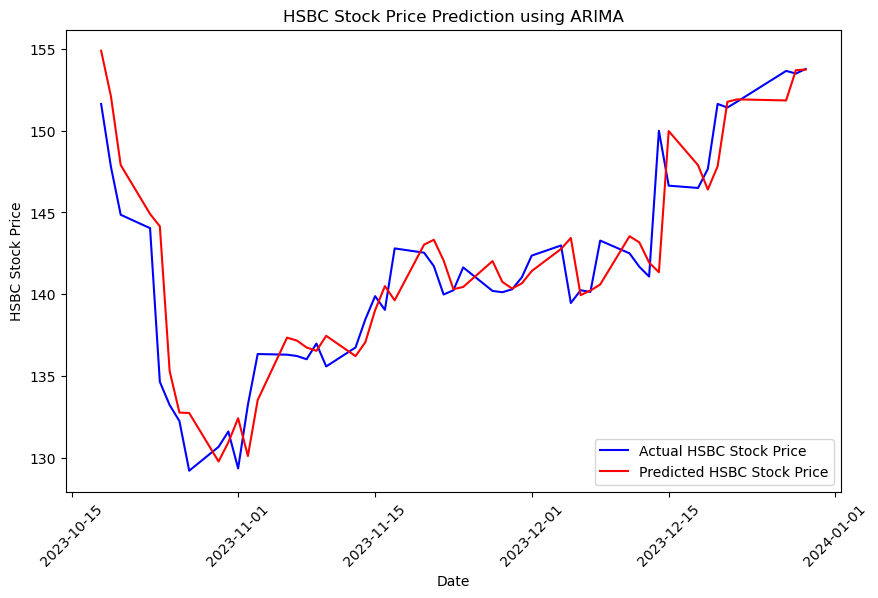

In [15]:
# Inverse transforming the predicted values
predicted_values = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), 2)), np.array(predictions).reshape(-1, 1))))
predicted_values
# Plotting the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df_2023['Date'][-len(predicted_values):], df_2023['Close'][-len(predicted_values):], color='blue', label='Actual HSBC Stock Price')
plt.plot(df_2023['Date'][-len(predicted_values):], predicted_values[:, 2], color='red', label='Predicted HSBC Stock Price')
plt.title('HSBC Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('HSBC Stock Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [16]:
# Inverse transforming the predicted values
predicted_values = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), 2)), np.array(predictions).reshape(-1, 1))))

# Add predicted values to a new column in the original dataset
df_2023['Predicted_Price'] = np.nan  # Create a new column for predicted prices
df_2023.loc[df_2023.index[-len(predicted_values):], 'Predicted_Price'] = predicted_values[:, 2]  # Assign predicted prices to corresponding rows

# Display the updated DataFrame with the predicted prices
print(df_2023)

           Date        Open        High         Low       Close   Adj Close  \
8861 2023-01-03  159.520004  164.309998  159.080002  163.600006  155.986023   
8862 2023-01-04  164.100006  168.289993  164.100006  168.080002  160.257523   
8863 2023-01-05  167.179993  173.740005  166.360001  172.419998  164.395523   
8864 2023-01-06  171.820007  172.699997  171.339996  172.100006  164.090439   
8865 2023-01-09  172.100006  174.160004  171.880005  172.619995  164.586227   
...         ...         ...         ...         ...         ...         ...   
9107 2023-12-21  150.039993  152.559998  148.880005  151.419998  151.419998   
9108 2023-12-22  149.899994  152.080002  149.880005  151.779999  151.779999   
9109 2023-12-27  152.600006  154.720001  150.860001  153.660004  153.660004   
9110 2023-12-28  153.460007  154.039993  152.800003  153.500000  153.500000   
9111 2023-12-29  153.380005  153.820007  152.960007  153.779999  153.779999   

          Volume           R3           S3  Predict

/var/folders/bb/blvf8z_16hzfnr9b5842_2j40000gn/T/ipykernel_43722/2903338273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Predicted_Price'] = np.nan  # Create a new column for predicted prices


In [ ]:
from pymongo import MongoClient

# Ensure these are the correct credentials for your MongoDB user
username = 'new_user_5'
password = 'newuser123'  # The password should be URL-encoded if necessary
cluster_address = 'smppcluster.gwsyw43.mongodb.net'
db_name = 'Health'  # The name of the database you want to use
collection_name = 'AZN.L'  # The name of the collection

# Use f-string to insert variables into the connection string, and ensure the password is URL-encoded if it contains special characters
conn_string = f'mongodb+srv://{username}:{password}@{cluster_address}/{db_name}?retryWrites=true&w=majority&appName=SMPPCluster'

client = MongoClient(conn_string)

# Select your database
db = client[db_name]

# Select your collection
collection = db[collection_name]

# Assuming 'test_f' is your pandas DataFrame and it's defined earlier in the code.
# Convert the DataFrame to a list of dictionaries for insertion
test_f_records = df_2023.to_dict(orient='records')

# Insert the records into MongoDB
collection.insert_many(test_f_records)

# Feedback to confirm the operation
print(f"Inserted {len(test_f_records)} records into the collection {collection_name} in the database {db_name}.")

In [ ]:
df_2023.to_csv('pred.csv', index=False)

In [17]:
# Calculate Mean Absolute Percentage Error (MAPE) in percentage
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Convert the actual and predicted values back to their original scale
actual_values = df_2023['Close'][-len(predicted_values):].values
forecasted_values = predicted_values[:, 2]

# Calculate MAPE?
mape = calculate_mape(actual_values, forecasted_values)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 1.27%


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecasted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecasted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#print("Mean Absolute Error (MAE):", mae)
#print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 2.600676317727215
